# Unsupervised Learning
## Project: Creating Customer Segments

In this project, you will analyze a dataset containing data on various customers' **annual spending amounts** (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the** variation in the different types of customers** that a wholesale distributor interacts with. Doing so would **equip** the distributor with **insight into how to best structure their delivery service** to meet the needs of each customer. 

Many companies today collect vast amounts of data on customers and clientele, and have a strong desire to understand the meaningful relationships hidden in their customer base. Being equipped with this information can assist a company engineer future products and services that best satisfy the demands or needs of their customers.

A wholesale distributor recently tested a change to their delivery method for **some customers**, by moving from a **morning delivery service** "five days" a week to a **cheaper evening delivery service** "three days" a week. Initial testing did not discover any significant unsatisfactory results, so they implemented the **cheaper option** for all customers. Almost immediately, the distributor began getting complaints about the delivery service change and customers were canceling deliveries — losing the distributor more money than what was being saved. You’ve been hired by the wholesale distributor to find **what types of customers** they have to help them make better, more informed business decisions in the future. 

Our task is to use unsupervised learning techniques to see if any similarities exist between customers, and how to best segment customers into distinct categories.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). This is product spending data collected for customers of a wholesale distributor in Lisbon, Portugal to identify customer segments hidden in the data. For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.
- 1)	FRESH: annual spending (m.u.) on fresh products (Continuous); 
- 2)	MILK: annual spending (m.u.) on milk products (Continuous); 
- 3)	GROCERY: annual spending (m.u.)on grocery products (Continuous); 
- 4)	FROZEN: annual spending (m.u.)on frozen products (Continuous) 
- 5)	DETERGENTS_PAPER: annual spending (m.u.) on detergents and paper products (Continuous) 
- 6)	DELICATESSEN: annual spending (m.u.)on and delicatessen products (Continuous); 
- 7)	CHANNEL: customersâ€™ Channel - Horeca (Hotel/Restaurant/CafÃ©) or Retail channel (Nominal) 
- 8)	REGION: customersâ€™ Region â€“ Lisnon, Oporto or Other (Nominal) 

"cold cuts, cheeses, a variety of salads, a selection of unusual, foreign prepared foods, etc"

[To Do]
- First explore the data by selecting a small subset to sample and determine if any product categories highly correlate with one another. 
- Afterwards, preprocess the data by scaling each product category and then identifying (and removing) unwanted outliers. 
- With the good, clean customer spending data, apply PCA transformations to the data and implement clustering algorithms to segment the transformed customer data. 
- Finally, compare the segmentation found with an additional labeling and consider ways this information could assist the wholesale distributor with future service changes. 

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print("Wholesale customers dataset has {} samples with {} features each.".format(*data.shape))
except:
    print("Dataset could not be loaded. Is the dataset missing?")

Wholesale customers dataset has 440 samples with 6 features each.


In [2]:
data.head(2)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [3]:
# Display a description of the dataset
display(data.describe())
# IQR...the length of the middle 50% of that interval of space: where the bulk of the values lie? a typical value? a median?
# The IQR approximates the amount of spread in the middle half of the data. 
#IQR = (local median after "main_median" - local median before "main_median") = the distance from Q_3 to Q_1
# = About 50% percent of the data is between  Q_3 to Q_1..

#percentile here..
# here, percentile 50% means the "main_median". 
# here, percentile 25% means Q_1.
# here, percentile 75% means Q_3.

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [4]:
data[data.Grocery == data.Grocery.max()]
data.loc[data.Detergents_Paper == data.Detergents_Paper.max()]

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
85,16117,46197,92780,1026,40827,2944


In [5]:
data.Delicatessen.sort_values()[-2:]

23     16523
183    47943
Name: Delicatessen, dtype: int64

- I think in order to choose the three records disparate most each other, we should consider the difference of mean, median, mode, variance, maximum, minimum of each feature. 
![](meanmedianmode.gif)
  - "Fresh": 
    - signigicantly huge total purchases;  
    - the most significant variance(12647.33), huge difference between mean(12000) and median(8500); 
    - a right skewed significantly.
  - "Milk":
    - not outstanding mean(5796) and variance(7380), median(3627); 
    - a slightly right-skewed distribution.
  - "Grocery":
    - not outstanding mean(7951) and variance(9503), median(4756); 
    - a slightly right-skewed distribution.
  - "Frozen": 
    - not outstanding mean(3071) and variance(4855), median(1526); 
    - a slightly right-skewed distribution.
  - "Detergents_paper":
    - not outstanding mean(2881) and variance(4768), 
    - small median(800), 
    - a more right-skewed distribution.
  - "Delicatessen":
    - not outstanding mean(1524) and variance(2820), 
    - small median(966), 
    - a slightly right-skewed distribution.

## ==> Seemingly hard to determine...

### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. **It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.**

We can filter samples based on the quartiles!!! The establishments in the first and third quartiles would be considered different significantly. 

In [6]:
# (q1, q3)
Fresh_q1 = 3127.75
Fresh_q3 = 16933.75

Milk_q1 = 1533.00
Milk_q3 = 7190.25

Grocery_q1 = 2153.00
Grocery_q3 = 10655.75

Frozen_q1 = 742.25
Frozen_q3 = 3554.25

Detergents_Paper_q1 = 256.75
Detergents_Paper_q3 = 3922.00

Delicatessen_q1 = 408.25
Delicatessen_q3 = 1820.25

In [7]:
data.loc[data.Fresh < Fresh_q1].head(), data.loc[data.Fresh > Fresh_q3].head()

(    Fresh   Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
 16   1020   8816    12121     134              4508          1080
 31   2612   4339     3133    2088               820           985
 34   1502   1979     2262     425               483           395
 35    688   5491    11091     833              4239           436
 43    630  11095    23998     787              9529            72,
     Fresh   Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
 4   22615   5410     7198    3915              1777          5185
 12  31714  12319    11757     287              3881          2931
 13  21217   6208    14982    3095              6707           602
 14  24653   9465    12091     294              5058          2168
 18  18601   6327    10099    2205              2767          3181)

In [8]:
data.loc[data.Milk < Milk_q1].head(), data.loc[data.Milk > Milk_q3].head()

(    Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
 3   13265  1196     4221    6404               507          1788
 11  13146  1124     4523    1420               549           497
 15  10253  1114     3821     397               964           412
 21   5567   871     2010    3383               375           569
 26   9898   961     2861    3151               242           833,
    Fresh   Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
 0  12669   9656     7561     214              2674          1338
 1   7057   9810     9568    1762              3293          1776
 2   6353   8808     7684    2405              3516          7844
 5   9413   8259     5126     666              1795          1451
 9   6006  11093    18881    1159              7425          2098)

In [9]:
data.loc[data.Grocery < Grocery_q1].head(), data.loc[data.Grocery > Grocery_q3].head()

(    Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
 21   5567   871     2010    3383               375           569
 39  56159   555      902   10002               212          2916
 50   6269  1095     1980    3860               609          2162
 54  27329  1449     1947    2436               204          1333
 58  13779  1970     1648     596               227           436,
     Fresh   Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
 9    6006  11093    18881    1159              7425          2098
 10   3366   5403    12974    4400              5977          1744
 12  31714  12319    11757     287              3881          2931
 13  21217   6208    14982    3095              6707           602
 14  24653   9465    12091     294              5058          2168)

In [10]:
data.loc[data.Frozen < Frozen_q1].head(), data.loc[data.Frozen > Frozen_q3].head()

(    Fresh   Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
 0   12669   9656     7561     214              2674          1338
 5    9413   8259     5126     666              1795          1451
 6   12126   3199     6975     480              3140           545
 8    5963   3648     6192     425              1716           750
 12  31714  12319    11757     287              3881          2931,
     Fresh   Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
 3   13265   1196     4221    6404               507          1788
 4   22615   5410     7198    3915              1777          5185
 10   3366   5403    12974    4400              5977          1744
 22  31276   1917     4469    9408              2381          4334
 23  26373  36423    22019    5154              4337         16523)

In [11]:
data.loc[data.Detergents_Paper < Detergents_Paper_q1].head(), data.loc[data.Detergents_Paper > Detergents_Paper_q3].head()

(    Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
 26   9898   961     2861    3151               242           833
 27  14276   803     3045     485               100           518
 39  56159   555      902   10002               212          2916
 54  27329  1449     1947    2436               204          1333
 58  13779  1970     1648     596               227           436,
     Fresh   Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
 9    6006  11093    18881    1159              7425          2098
 10   3366   5403    12974    4400              5977          1744
 13  21217   6208    14982    3095              6707           602
 14  24653   9465    12091     294              5058          2168
 16   1020   8816    12121     134              4508          1080)

In [12]:
data.loc[data.Delicatessen < Delicatessen_q1].head(), data.loc[data.Delicatessen > Delicatessen_q3].head()

(    Fresh   Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
 25  16165   4230     7595     201              4003            57
 32  21632   1318     2886     266               918           405
 34   1502   1979     2262     425               483           395
 42  10850   7555    14961     188              6899            46
 43    630  11095    23998     787              9529            72,
     Fresh   Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
 2    6353   8808     7684    2405              3516          7844
 4   22615   5410     7198    3915              1777          5185
 7    7579   4956     9426    1669              3321          2566
 9    6006  11093    18881    1159              7425          2098
 12  31714  12319    11757     287              3881          2931)

## I chose the sample '0', '3', '12' show the biggest disparity.
This is because these indices appear more often than others, registering different quartile range of each field, thus seem more convincing.

'0': higher in 'Milk', but lower in 'Frozen'

'3': lower in 'Milk', but higher in 'Frozen'

'12': higher in 'Fresh','Grocery','Delicatessen', but lower in Frozen'

In [13]:
# TODO: Select three indices of your choice you wish to sample from the dataset
indices = [0,3,12]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print("Chosen samples of wholesale customers dataset:")
display(samples)

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,12669,9656,7561,214,2674,1338
1,13265,1196,4221,6404,507,1788
2,31714,12319,11757,287,3881,2931


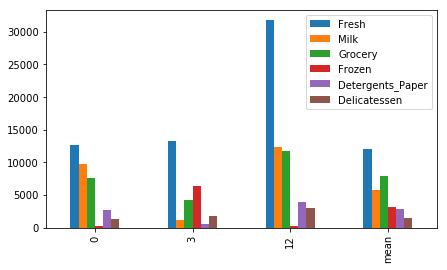

In [14]:
samples_bar = samples.append(data.describe().loc['mean', :])

#x_axis
samples_bar.index = indices + ['mean']

samples_bar.plot(kind='bar', figsize=(7,4))

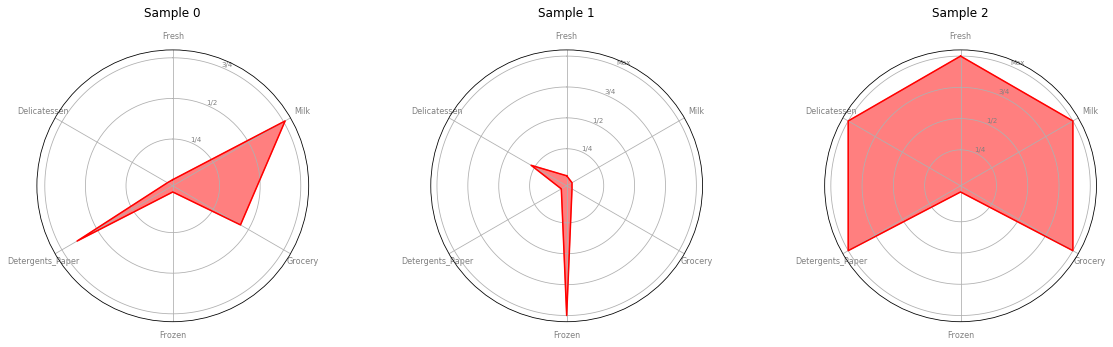

In [16]:
# radar plot super cooool !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df = np.round(samples, 1)
index  = df.index[:]
categories = list(df)
df = scaler.fit_transform(df)*100
N = len(categories)
angles = [n / float(N) * 2 * np.pi for n in range(N)]
angles += angles[:1]

plt.figure(figsize=(20, 5))
def Radar(index, title, color):
    ax = plt.subplot(1, 3, index+1, polar=True)
    ax.set_theta_offset(np.pi/2)
    ax.set_theta_direction(-1)
    plt.xticks(angles[:-1], categories, color ='grey', size = 8)
    plt.yticks((25, 50, 75, 100), ("1/4", "1/2", "3/4", "Max"), color = "grey", size = 7)
    values = df[index]
    values = np.append(values, values[:1])
    ax.plot(angles, values, color = color)
    ax.fill(angles, values, color=color, alpha=0.5)
    plt.title('Sample {}'.format(title), y= 1.1)

for i, n in enumerate(index):
    Radar(index=i, title=n, color='r')

### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  

* What kind of establishment (customer) could each of the three samples you've chosen represent?

**Hint:** Examples of establishments include places like markets, cafes, delis, wholesale retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant. You can use the mean values for reference to compare your samples with. The mean values are as follows:

* Fresh: 12000.2977
* Milk: 5796.2
* Grocery: 7951.3
* Frozen: 3071.93
* Detergents_paper: 2881.4
* Delicatessen: 1524.8

Knowing this, how do your samples compare? Does that help in driving your insight into what kind of establishments they might be? 

**Answer:** 


## Based on the comparison chart above,

### index_0: 
It might be **[a small sized upscale restaurant]** because they only use fresh ingredients.  
 - Average spending on 'Fresh','Milk','Grocery', 'Detergents_Paper', 'Delicatessen'
 - Almost zero spending on 'Frozen'

### index_1: 
It might be **[a cheap takeout food chain]** because they mainly supply cheap frozen food and do not provide basic items such as paper, detergent, milk which are unnecessary for takeout food chains.  
 - less spending on 'Milk','Grocery','Detergents_Paper'
 - higher spending on 'Frozen'

### index_2: 
It might be **[a fresh food retailer with cafe]** because they focus on supplying fresh food, but care offering some eating places at the same time.   
 - Extremely high spending on 'Fresh', higher spending on 'Milk','Grocery', 'Detergents_Paper', 'Delicatessen' 
 - Almost zero spending on 'frozen'

###########################################################################################################################
###########################################################################################################################
### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories **is actually relevant** for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? (We want the anti-Multicollinearity!!!)

**We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.**


Implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [17]:
data.columns

Index(['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper',
       'Delicatessen'],
      dtype='object')

In [18]:
# TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
#new_data = data.drop(['Milk'], axis=1) #0.15
#target_data = data.Milk
#new_data = data.drop(['Fresh'], axis=1) #-0.38
#target_data = data.Fresh
new_data = data.drop(['Grocery'], axis=1) #0.68
target_data = data.Grocery
#new_data = data.drop(['Frozen'], axis=1) #-0.21
#target_data = data.Frozen
#new_data = data.drop(['Detergents_Paper'], axis=1) #0.27
#target_data = data.Detergents_Paper
#new_data = data.drop(['Delicatessen'], axis=1) #-2.25
#target_data = data.Delicatessen

# TODO: Split the data into training and testing sets(0.25) using the given feature as the target. Set a random state.
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(new_data, target_data, test_size=0.25, random_state=42)

# TODO: Create a decision tree regressor and fit it to the training set
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=42).fit(X_train, y_train)
test_pred = regressor.predict(X_test)

# TODO: Report the score of the prediction using the testing set
from sklearn.metrics import r2_score
score = r2_score(y_test, test_pred); score

C:\Users\Minkun\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


0.6818840085440834

### Question 2

* Which feature did you attempt to predict? 
* What was the reported prediction score? 
* Is this feature necessary for identifying customers' spending habits?

**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. **A negative `R^2` implies the model fails to fit the data.** If you get a low score for a particular feature, that lends us to beleive that that feature point is hard to predict using the other features, thereby making it an important feature to consider when considering relevance.

**Answer:**
- I tried to predict each feature as a response variable in order to detect the sources of multicollinearity. 

- The prediction scores are reported : 'Milk'(0.15), 'Fresh'(-0.38), 'Grocery'(0.68), 'Frozen'(-0.21), 'Detergents_Paper'(0.27), 'Delicatessen'(-2.25). 

- As seen here, "Fresh", "Frozen" and "Delicatessen" as dependent variables have negative R2 scores and "Milk","Detergents_Paper" have very small R2 scores. Their negative or small scores imply that they are useful to identify customers' spending pattern because the remaining features cannot explain the variation in them, thus tells us they are uncorrelated. I believe we can better understand customer's spending habit by tackling with those features of low, negative r^2 scores.  

Based on this model, Fresh is an independent feature, so necessary. Thus if we have a high r^2 score(high correlation with other features), this would not be good for identifying customers' spending habits(since the customer would purchase other products along with the one we are predicting, as we could actually derive this feature from the rest of the features). Therefore a negative / low r^2 value would represent the opposite as we could identify the customer's specific behavior just from the one feature.

Is it explaining that customers have a penchant of spending money on 'Grocery' whenever buying other products, hence 'Grocery' is the irrelavant or redundant field for understanding customer purchasing ???? Correct. Grocery can be derived from the other features, so not necessary.

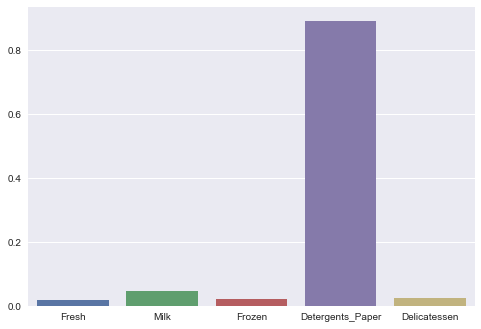

In [33]:
# check out with features that can derive Grocery
import seaborn as sns
sns.barplot(X_train.columns, regressor.feature_importances_)

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. 
- If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. 
- Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. 

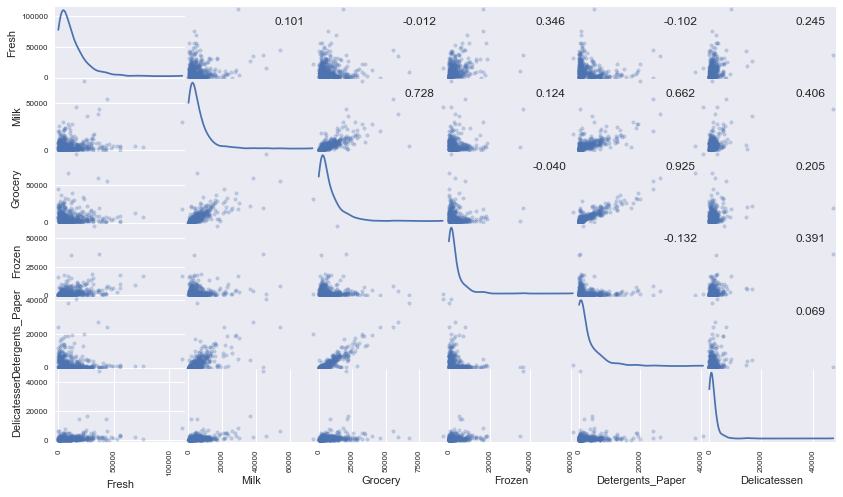

In [35]:
# Produce a scatter matrix for each pair of features in the data
axes = pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde')

corr = data.corr().as_matrix()
for i, j in zip(*np.triu_indices_from(axes, k=1)):
    axes[i, j].annotate("%.3f" %corr[i,j], (0.8, 0.8), xycoords='axes fraction', ha='center', va='center')

### Question 3
* Using the scatter matrix as a reference, discuss the distribution of the dataset, specifically talk about the **normality, outliers, large number of data points near 0 among others**. If you need to sepearate out some of the plots individually to further accentuate your point, you may do so as well.
* Are there any pairs of features which exhibit some degree of correlation? 
* Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? 
* How is the data for those features distributed?

**Hint:** Is the data normally distributed? Where do most of the data points lie? You can use [corr()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html) to get the feature correlations and then visualize them using a [heatmap](http://seaborn.pydata.org/generated/seaborn.heatmap.html)(the data that would be fed into the heatmap would be the correlation values, for eg: `data.corr()`) to gain further insight.

In [36]:
data.corr()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Fresh,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690
Milk,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368
Grocery,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497
Frozen,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947
Detergents_Paper,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291
Delicatessen,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000


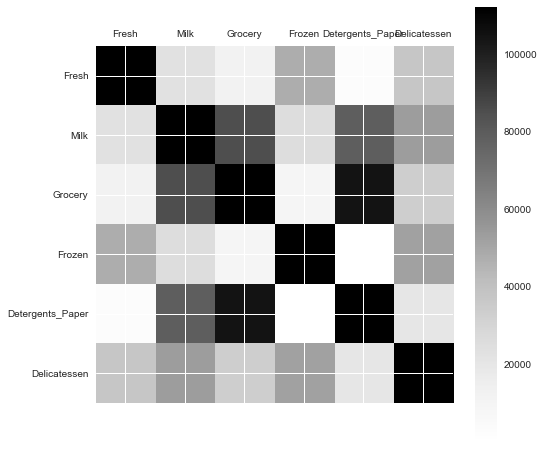

In [37]:
import matplotlib.pyplot as plt
%matplotlib inline
corr = data.corr()

fig, ax = plt.subplots(figsize=(8, 8))
cax = ax.matshow(data, interpolation='nearest')

ax.matshow(corr)
fig.colorbar(cax)

plt.xticks(range(len(corr.columns)), corr.columns);
plt.yticks(range(len(corr.columns)), corr.columns);

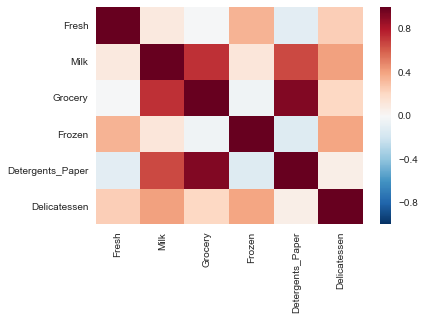

In [38]:
import seaborn as sb
sb.heatmap(data.corr())

**Answer:**
- It is obvious that every feature here does not hold decent normality as indicated by their too many outliers, uni-modal plots skewing to the right with most points flocking around '0'. There are so many outliers at the tails of the distribution.

- 'Grocery' particularly shows certain correlations with all other features except 'Delicatessen'. If ranking them in order from strongest to weakest:
  - positive: 'Detergents_Paper', 'Milk'
  - negative: 'Fresh','Frozen'.

- Interestingly, 'Delicatessen' shows absolutely no association with any others. 

- These features that are strongly correlated does lend credence to our initial claim that 'Grocery' may not be necessary for identifying customers' spending habits. 'Grocery' has a high correlation with 'Detergents_Paper' and 'Milk' that corresponds to a relatively high R^2 score when we regress 'Grocery' on all other features.

- This denies my suspicions about the relevance of 'Grocery'. I thought 'Grocery' is evenly associated with other features, thus explained well by them. But we cannot predict the behavior of 'Delicatessen' because of its lack of relationship with others.

- It seems that data of these features are all not normally distributed...I think clustering algorithms require them to be normally distributed.

## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
**If data is not normally distributed**, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

Implement the following:
 - Assign a copy of the data to `log_data` after applying logarithmic scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying logarithmic scaling. Again, use `np.log`.

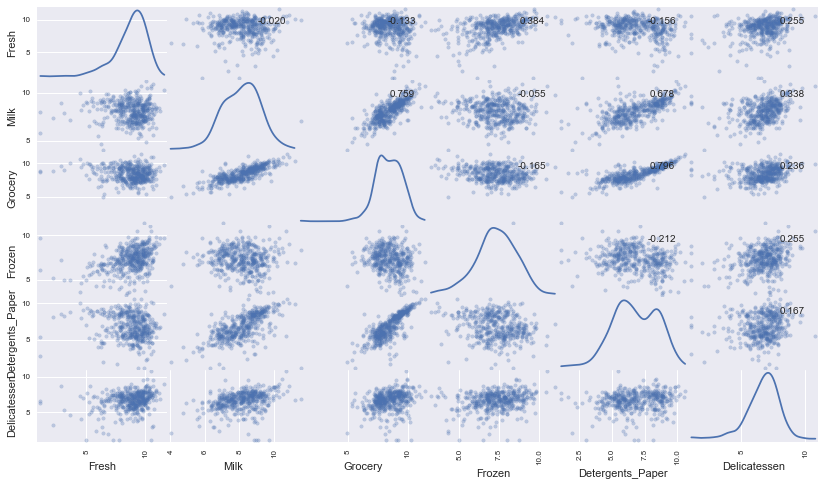

In [39]:
# TODO: Scale the data using the natural logarithm
log_data = np.log(data)

# TODO: Scale the sample data using the natural logarithm
log_samples = np.log(samples)

# Produce a scatter matrix for each pair of newly-transformed features
log_axes = pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde')

log_corr = log_data.corr().as_matrix()
for i, j in zip(*np.triu_indices_from(log_axes, k=1)):
    log_axes[i, j].annotate("%.3f" %log_corr[i,j], (0.8, 0.8), xycoords='axes fraction', ha='center', va='center')

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [40]:
# Display the log-transformed sample data
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,9.446913,9.175335,8.930759,5.365976,7.891331,7.198931
1,9.492884,7.086738,8.347827,8.764678,6.228511,7.488853
2,10.364514,9.418898,9.372204,5.659482,8.263848,7.983099


### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.
![](P37.jpg) 
Implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.
 


**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [41]:
log_data.keys()

Index(['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper',
       'Delicatessen'],
      dtype='object')

In [49]:
# For each feature find the data points with extreme high or low values
for i in log_data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[i], 25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[i], 75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = 1.5*(Q3 - Q1)
    
    # Display the outliers
    print("Data points considered outliers for the feature '{}':".format(i))
    display(log_data[~((log_data[i] >= Q1 - step) & (log_data[i] <= Q3 + step))])
    
# OPTIONAL: Select the indices for data points you wish to remove
outliers  = [65, 66, 75, 128, 154]

# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)

Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
171,5.298317,10.160530,9.894245,6.478510,9.079434,8.740337
193,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
304,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382


Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275


Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
145,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
175,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617
264,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827
325,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215
429,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446
439,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244


Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101


Data points considered outliers for the feature 'Delicatessen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
183,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372


### Question 4
* Are there any data points considered outliers for more than one feature based on the definition above? 
* Should these data points be removed from the dataset? 
* If any data points were added to the `outliers` list to be removed, explain why.

** Hint: ** If you have datapoints that are outliers in multiple categories think about why that may be and if they warrant removal. Also note how k-means is affected by outliers and whether or not this plays a factor in your analysis of whether or not to remove them.

In [50]:
Q1 = np.percentile(log_data['Fresh'], 25)
Q3 = np.percentile(log_data['Fresh'], 75)
step = 1.5*(Q3 - Q1)

a = log_data[~((log_data['Fresh'] >= Q1 - step) & (log_data['Fresh'] <= Q3 + step))]

In [51]:
Q1 = np.percentile(log_data['Delicatessen'], 25)
Q3 = np.percentile(log_data['Delicatessen'], 75)
step = 1.5*(Q3 - Q1)

b = log_data[~((log_data['Delicatessen'] >= Q1 - step) & (log_data['Delicatessen'] <= Q3 + step))]

In [52]:
Q1 = np.percentile(log_data['Frozen'], 25)
Q3 = np.percentile(log_data['Frozen'], 75)
step = 1.5*(Q3 - Q1)

c = log_data[~((log_data['Frozen'] >= Q1 - step) & (log_data['Frozen'] <= Q3 + step))]

In [53]:
# Fresh / Delicatessen
pd.concat([a,b])[pd.concat([a,b]).duplicated()]

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612


In [54]:
# Fresh / Frozen
pd.concat([a,c])[pd.concat([a,c]).duplicated()]

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523


In [55]:
# Delicatessen / Frozen
pd.concat([c,b])[pd.concat([c,b]).duplicated()]

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen


**Answer:**
- the data point with index**'75'** is the shared outlier of 'Grocery','Detergents_Paper'. The data point with index**'154'** is the shared outlier between 'Delicatessen','Grocery','Milk'. The data point with index**'66, 128'** is the shared outlier between 'Fresh','Delicatessen'. The data points with index**'65'** are the shared outlier of 'Fresh','Frozen'.

- I guess they should be removed as they are not only outliers in one categories but more than once. 
- What will happen if we remove those outliers? I think outlier should be discarded for the better result because they are not of any importance. They are not representative of our general customers.
- Outliers can greatly affect distributions, influence a **distance based algorithm** like clustering and/or PCA! The loss function of the K-means algorithm is defined the terms of sum-of-squared distances, making it sensitive to outliers. In an attempt to reduce the loss function, the algorithm would move a centroid away from the true center of a cluster towards the outlier. This is clearly not the behavior we want.

---
# Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the **underlying structure** of the wholesale customer data. Since using PCA on a dataset calculates the **dimensions** which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

>Fight against high dimensionality

>Fight against multicollinearity

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a **component (dimension)** from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

Implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

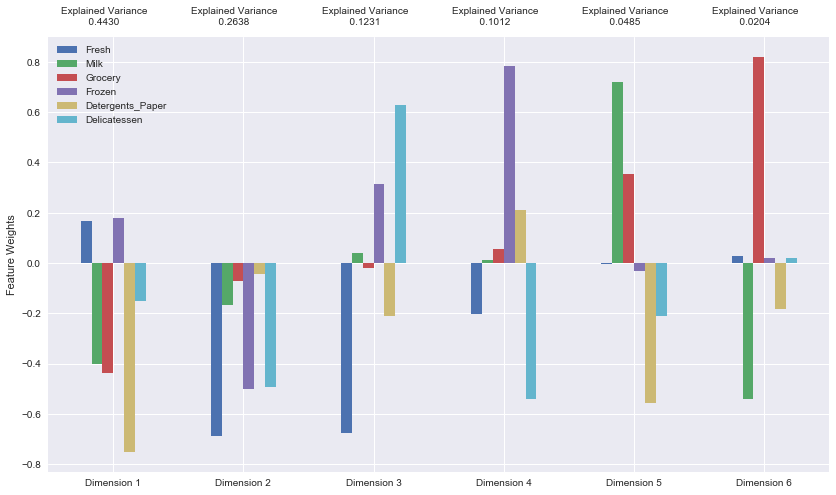

In [56]:
# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
from sklearn.decomposition import PCA

pca = PCA(n_components=6).fit(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = vs.pca_results(good_data, pca)

In [57]:
type(pca_results), pca_results # shows the eigenvalues(explained var) of the cov-matrix and the corresponding eigenvectors ?

(pandas.core.frame.DataFrame,
              Explained Variance   Fresh    Milk  Grocery  Frozen  \
 Dimension 1              0.4430  0.1675 -0.4014  -0.4381  0.1782   
 Dimension 2              0.2638 -0.6859 -0.1672  -0.0707 -0.5005   
 Dimension 3              0.1231 -0.6774  0.0402  -0.0195  0.3150   
 Dimension 4              0.1012 -0.2043  0.0128   0.0557  0.7854   
 Dimension 5              0.0485 -0.0026  0.7192   0.3554 -0.0331   
 Dimension 6              0.0204  0.0292 -0.5402   0.8205  0.0205   
 
              Detergents_Paper  Delicatessen  
 Dimension 1           -0.7514       -0.1499  
 Dimension 2           -0.0424       -0.4941  
 Dimension 3           -0.2117        0.6286  
 Dimension 4            0.2096       -0.5423  
 Dimension 5           -0.5582       -0.2092  
 Dimension 6           -0.1824        0.0197  )

In [58]:
# Cumulative explained variance should add to 1
display(pca_results['Explained Variance'].cumsum())

Dimension 1    0.4430
Dimension 2    0.7068
Dimension 3    0.8299
Dimension 4    0.9311
Dimension 5    0.9796
Dimension 6    1.0000
Name: Explained Variance, dtype: float64

# I don't know..Feature Weights...they can be positive , nagative,.. a bunch of coordinates of the eigenvectors of the cov-matrix?????

Remember that the sign of the features in the component really wouldn't matter too much, since if we multiply the entire PCA dimension by -1 it would still be the same PCA component (so the first PCA component refers to the spending of Milk, Deter, and Grocery regardless of the direction of the vectors). As for each component the prevalent features refer to the highest absolute magnitude.

And a principal component with feature weights that have opposite directions can reveal how customers buy more in one category while they buy less in the other category.

For example, in terms of customers spending, since PCA deals with the variance of the data and the correlation between features, the first component would represent that we have some customers who purchase a lot of Milk, Grocery and Detergents_Paper products while other customers purchase very few amounts of Milk, Grocery and Detergents_Paper, hence spread in the data. So maybe this component could represent retail spending.

![](pca_example2d.gif)

### Question 5

* How much variance in the data is explained* **in total** *by the first and second principal component? 
* How much variance in the data is explained by the first four principal components? 
* Using the visualization provided above, talk about each dimension and the cumulative variance explained by each, stressing upon **which features are well represented by each new dimension**(both in terms of positive and negative variance explained). Discuss what the first four dimensions best represent in terms of customer spending.

**Hint:** A positive increase in a specific dimension corresponds with **an *increase* of the *positive-weighted* features** and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the individual feature weights.

**Answer:**
- As seen from the chart(0.44 + 0.26 = 0.70), roughly 70% of variance in the data is explained by the first and second components.

- 0.44 + 0.26 + 0.12 + 0.1 = 0.92, roughly 92% of the variance in the data is explained by the first four principal components.


- Components breakdown:
  - The first principal component (PC1):
    - A decrease in PC1 is associated with large increases in "Milk", "Grocery" and "Detergents_Paper" spending. This is in line with our initial findings where the 3 features are highly correlated.
    - Perhaps, it represents a group of **cafe**. 

  - The second principal component (PC2):
    - A decrease in PC2 is associated with large increases in "Fresh", "Frozen" and "Delicatessen" spending. Interestingly, the features in PC1 have very small positive weights.
    - Perhaps, it represents a group of **fresh food retail**.

  - The third principal component (PC3):
    - An increase in PC3 is associated with a large increase in "Delicatessen" and a large decrease in "Fresh" spending.
    - Perhaps, it represents a group of **high-level restaurant**.

  - The fourth principal component (PC4):
    - An increase in PC4 is associated with a large increasing in "Frozen" and a large decrease in "Delicatessen" spending.
    - Perhaps, it represents a group of **low-level restaurant**.

### Observation
How the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions? Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [59]:
pca_results.index.values

array(['Dimension 1', 'Dimension 2', 'Dimension 3', 'Dimension 4',
       'Dimension 5', 'Dimension 6'], dtype=object)

In [60]:
type(pca_samples)

numpy.ndarray

In [61]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,-1.7580,0.0097,-0.9590,-1.6824,0.2680,-0.3891
1,1.1553,-1.4052,0.5422,0.4127,-0.6865,0.6409
2,-2.2406,-1.2419,-1.0729,-1.9589,0.2160,-0.1782


### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the **cumulative explained variance ratio** is extremely important for knowing how many dimensions are necessary for the problem. 

**Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.**

Implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the results to `reduced_data`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [62]:
# TODO: Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components=2).fit(good_data)

# TODO: Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)
# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

### Observation
How the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions? Observe how the values for the first two dimensions remains **unchanged** when compared to a PCA transformation in six dimensions.

In [63]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,-1.7580,0.0097
1,1.1553,-1.4052
2,-2.2406,-1.2419


## Visualizing a Biplot
A biplot is a scatterplot where each data point is represented by its scores along the principal components. The axes are the principal components (in this case `Dimension 1` and `Dimension 2`). In addition, the biplot shows the **projection of the original features along the components**. A biplot can help us interpret the reduced dimensions of the data, and **discover relationships between the principal components and original features.**

produce a biplot of the reduced-dimension data.

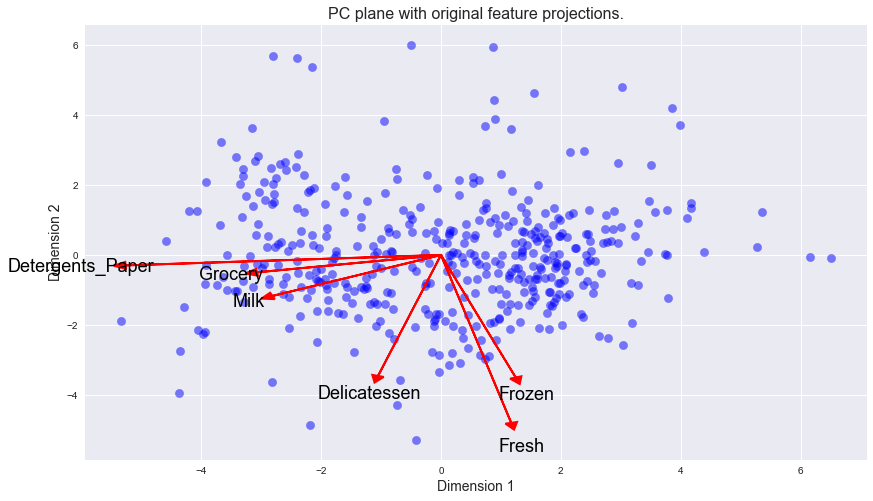

In [64]:
# Create a biplot
vs.biplot(good_data, reduced_data, pca)

### Observation

Once we have the original feature projections (in red), it is easier to interpret the relative position of each data point in the scatterplot. For instance, a point the lower right corner of the figure will likely correspond to a customer that spends a lot on `'Milk'`, `'Grocery'` and `'Detergents_Paper'`, but not so much on the other product categories. 

From the biplot, which of the original features are most strongly correlated with the first component? What about those that are associated with the second component? Do these observations agree with the pca_results plot you obtained earlier? yes.

## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6

* What are the advantages to using a K-Means clustering algorithm? 
* What are the advantages to using a Gaussian Mixture Model clustering algorithm? 
* Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?

** Hint: ** Think about the differences between hard clustering and soft clustering and which would be appropriate for our dataset.

**Answer:**
- We use a K-Means as a hard-clustering. Each point is assigned to a particular cluster. It's easy to implement and interpret.
- We use a GMM as a soft-clustering. Each point is assigned to all the clusters with different weights(or probabilities). It allows flexibility in clustering shape(a cluster can contain another cluster). 

- I'd say we have to use GMM because we need more flexibile clustering. We know that the underlying structure of our dataset is not defined by individual features, but defined by the mixture of those features. There is no clear demarcation in our dataset. 

As the main two differences in these two algorithms are the speed and structural information of each:

>Speed:

> - K-Mean much faster and much more scalable. GMM slower since it has to incorporate information about the distributions of the data, thus it has to deal with the co-variance, mean, variance, and prior probabilities of the data, and also has to assign probabilities to belonging to each clusters.

>Structure:

> - K-Means straight boundaries (hard clustering). GMM you get much more structural information, thus you can measure how wide each cluster is, since it works on probabilities (soft clustering)

### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

Implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import `sklearn.metrics.silhouette_score` and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

In [65]:
# Imports
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Create range of clusters 
cluster_ranges = list(range(2,11)); cluster_ranges

[2, 3, 4, 5, 6, 7, 8, 9, 10]

### what "Distance Metric" to use ?

The Silhouette Coefficient is calculated using the mean intra-cluster distance and the mean nearest-cluster distance for each sample. Therefore, it makes sense to use the same distance metric here as the one used in the clustering algorithm. 
- **Euclidean** for KMeans 
- **Mahalanobis** for general GMM

In [66]:
# "k-means": Loop through clusters
for i in cluster_ranges:
    # TODO: Apply your clustering algorithm of choice to the reduced data 
    clusterer = KMeans(n_clusters=i).fit(reduced_data)

    # TODO: Predict the cluster for each data point
    preds = clusterer.predict(reduced_data)

    # TODO: Find the cluster centers
    centers = clusterer.cluster_centers_
    print(centers)

    # TODO: Predict the cluster for each transformed sample data point
    sample_preds = clusterer.predict(pca_samples)

    # TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
    score = silhouette_score(reduced_data, preds, metric='euclidean')
    print("When the cluster_size is {}, the AVG silhouette_score is : {}".format(i, score))

[[ 1.49093664 -0.10743169]
 [-2.17322969  0.15659534]]
When the cluster_size is 2, the AVG silhouette_score is : 0.42628101546910846
[[ 1.74488838  0.00598088]
 [-1.62798915 -1.21631317]
 [-1.8404065   2.11247443]]
When the cluster_size is 3, the AVG silhouette_score is : 0.3974234200078325
[[-2.11389956  2.09087287]
 [ 0.88977881 -1.06160784]
 [-2.22044761 -0.86020807]
 [ 2.20735485  0.97157732]]
When the cluster_size is 4, the AVG silhouette_score is : 0.3327470971178821
[[ 2.64218703  0.52461516]
 [-2.30665683 -0.85231133]
 [-2.55451657  2.41003117]
 [ 0.34084753  0.85722602]
 [ 0.95448386 -1.62649872]]
When the cluster_size is 5, the AVG silhouette_score is : 0.3509907789312652
[[ 2.28433265 -0.08359701]
 [-2.51427159 -0.80101731]
 [ 0.04321922  0.35397759]
 [-2.58215121  2.21704992]
 [ 0.24358515 -2.11640401]
 [ 1.57776098  3.28825217]]
When the cluster_size is 6, the AVG silhouette_score is : 0.3634526356380664
[[ 0.02817376  4.79374534]
 [ 1.76497491 -0.60543628]
 [-2.48922899 -

In [67]:
# "GMM": Loop through clusters
for i in cluster_ranges:
    # TODO: Apply your clustering algorithm of choice to the reduced data 
    clusterer = GaussianMixture(n_components=i).fit(reduced_data)

    # TODO: Predict the cluster for each data point
    preds = clusterer.predict(reduced_data)

    # TODO: Find the cluster centers
    centers = clusterer.means_
    print(centers)

    # TODO: Predict the cluster for each transformed sample data point
    sample_preds = clusterer.predict(pca_samples)

    # TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
    # what metric argument to use?? metric='mahalanobis'
    score = silhouette_score(reduced_data, preds, metric='mahalanobis')
    print("When the cluster_size is {}, the AVG silhouette_score is : {}.".format(i, score))

[[ 1.25648563 -0.17661209]
 [-2.2256852   0.31284314]]
When the cluster_size is 2, the AVG silhouette_score is : 0.3761556577675909.
[[ 1.17792711 -0.46220755]
 [-2.27761367  0.10719722]
 [ 1.36212676  0.71791426]]
When the cluster_size is 3, the AVG silhouette_score is : 0.342254608880423.
[[-1.97097258 -0.46137624]
 [ 1.62707733  0.336509  ]
 [-2.19201767  1.92346849]
 [ 1.09367956 -0.79500258]]
When the cluster_size is 4, the AVG silhouette_score is : 0.3009035343910248.
[[ 2.89055604  2.74631729]
 [ 1.76865762 -0.40780594]
 [-2.7795463   0.51412705]
 [-0.97372042 -1.33286692]
 [ 0.25511448  0.61821233]]
When the cluster_size is 5, the AVG silhouette_score is : 0.2606932111101687.
[[-2.10353425 -0.64271788]
 [ 2.68575132  2.384453  ]
 [-2.8387016   1.73166301]
 [ 1.8312541  -0.26856849]
 [ 0.20697997 -1.89774056]
 [ 0.07957196  0.53148599]]
When the cluster_size is 6, the AVG silhouette_score is : 0.31846415002209216.
[[ 1.33643768  3.1137108 ]
 [-2.00217465 -0.61737301]
 [ 2.964929

GaussianMixture(covariance_type='spherical', init_params='kmeans',
        max_iter=100, means_init=None, n_components=4, n_init=1,
        precisions_init=None, random_state=None, reg_covar=1e-06,
        tol=0.001, verbose=0, verbose_interval=10, warm_start=False,
        weights_init=None)


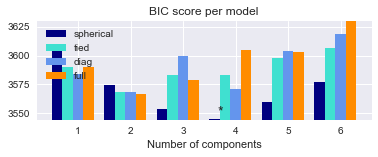

In [68]:
# fit GMM with EM....using BIC ???information-theoretic criteria (BIC) ???????????????????????????????????????
# BIC could sometimes be a better criterion for deciding on the optimal number of clusters.

lowest_bic = np.infty

bic = []

n_components_range = range(1, 7)
cv_types = ['spherical', 'tied', 'diag', 'full']
for i in cv_types:
    for j in n_components_range:
        # Fit a mixture of Gaussians with EM
        gmm = GaussianMixture(n_components=j, covariance_type=i)
        gmm.fit(reduced_data)
        bic.append(gmm.bic(reduced_data))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmm = gmm
print(best_gmm)

bic = np.array(bic)

import itertools
color_iter = itertools.cycle(['navy', 'turquoise', 'cornflowerblue',
                              'darkorange'])
clf = best_gmm
bars = []

# Plot the BIC scores
spl = plt.subplot(2, 1, 1)
for i, (cv_type, color) in enumerate(zip(cv_types, color_iter)):
    xpos = np.array(n_components_range) + .2 * (i - 2)
    bars.append(plt.bar(xpos, bic[i * len(n_components_range):
                                  (i + 1) * len(n_components_range)],
                        width=.2, color=color))
plt.xticks(n_components_range)
plt.ylim([bic.min() * 1.01 - .01 * bic.max(), bic.max()])
plt.title('BIC score per model')
xpos = np.mod(bic.argmin(), len(n_components_range)) + 0.65 + \
    0.2 * np.floor(bic.argmin() / len(n_components_range))
plt.text(xpos, bic.min() * 0.97 + 0.03 * bic.max(), '*', fontsize=14)
spl.set_xlabel('Number of components')
spl.legend([b[0] for b in bars], cv_types)

Since in unsupervised learning processes, we do not have a **ground truth** to generally compare to, this makes evaluating a clustering model quite interesting and there's a lot of literature on this, some other methods to consider are the information criterion methods such as AIC or BIC. (if it is possible to make a likelihood function for the clustering model. For example: The k-means model is "almost" a Gaussian mixture model and one can construct a likelihood for the Gaussian mixture model and thus also determine information criterion values)

**AIC**(Akaike information criterion) is an estimator of the relative quality of statistical models for a given set of data. Given a collection of models for the data, AIC estimates the quality of each model, relative to each of the other models. Thus, AIC provides a means for model selection. AIC is founded on information theory: it offers an estimate of the relative information lost when a given model is used to represent the process that generated the data. (In doing so, it deals with the trade-off between the goodness of fit of the model and the simplicity of the model.) AIC does not provide a test of a model in the sense of testing a null hypothesis. It tells nothing about the absolute quality of a model, only the quality relative to other models. Thus, if all the candidate models fit poorly, AIC will not give any warning of that.

**BIC**(Bayesian information criterion) is a criterion for model selection among a finite set of models; the model with the lowest BIC is preferred. It is based, in part, on the likelihood function and it is closely related to the AIC. When fitting models, it is possible to increase the likelihood by adding parameters, but doing so may result in overfitting. Both BIC and AIC attempt to resolve this problem by introducing a penalty term for the number of parameters in the model; the penalty term is larger in BIC than in AIC.

### Question 7

* Report the silhouette score for several cluster numbers you tried. 
* Of these, which number of clusters has the best silhouette score?

http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

**Answer:**
- In GMM, '2-clusters': 0.38, '3-clusters': 0.34, '4-clusters': 0.30, '5-clusters': 0.26,....
- In k-means, '2-clusters': 0.43, '3-clusters': 0.40, '4-clusters': 0.33, '5-clusters': 0.35,....

It seems '2-clusters' has the best score.

### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

In [69]:
clusterer = GaussianMixture(n_components=2).fit(reduced_data)
preds = clusterer.predict(reduced_data)
centers = clusterer.means_
sample_preds = clusterer.predict(pca_samples)

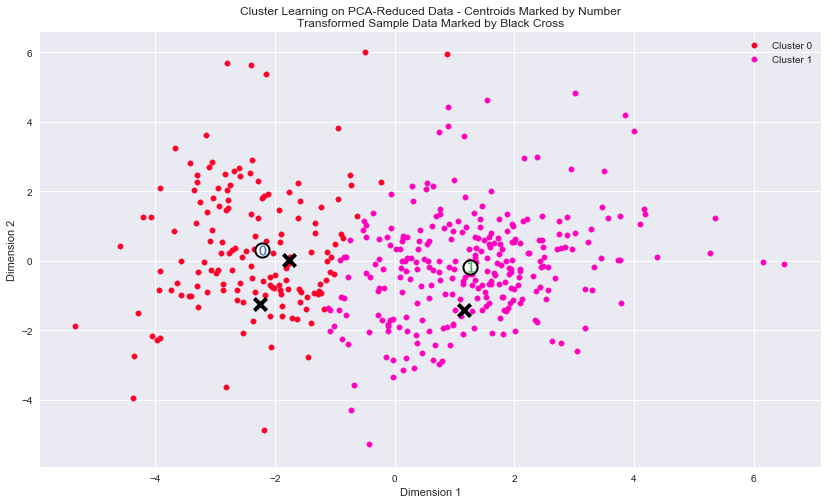

In [70]:
# Display the results of the clustering from implementation
vs.cluster_results(reduced_data, preds, centers, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. **Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.**

Implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers`, using `np.exp` and assign the true centers to `true_centers`.

In [71]:
# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,3552.0,7837.0,12219.0,870.0,4696.0,962.0
Segment 1,8953.0,2114.0,2765.0,2075.0,353.0,732.0


### Question 8

* Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project(specifically looking at the mean values for the various feature points). What **set of establishments** could each of the customer segments represent?

**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`. Think about what each segment represents in terms their values for the feature points chosen. Reference these values with the mean values to get some perspective into what kind of establishment they represent.

In [72]:
display(true_centers - data.mean())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,-8448.297727,2040.734091,4267.722727,-2201.931818,1814.506818,-562.870455
Segment 1,-3047.297727,-3682.265909,-5186.277273,-996.931818,-2528.493182,-792.870455


In [73]:
display(true_centers - data.median())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,-4952.0,4210.0,7463.5,-656.0,3879.5,-3.5
Segment 1,449.0,-1513.0,-1990.5,549.0,-463.5,-233.5


**Answer:**
- I'd say we should use deviations from the **median** since mean is sensitive to outliers and would not yield meaningful comparisons. When we use mean, for example, there are too many negative values in the Segment_1. 

- If we substitute median for mean, we can say..Establishments in the Segment_0 have above median spending on "Milk", "Grocery" and "Detergents_Paper". It might represent a bunch of **'cafes'**. Establishments in the Segment_1, 'Fresh' and 'frozen' are dominant. I guess, Segment_1 represents a bunch of **'markets specializing in fresh and frozen food'**.  

In [77]:
# we could also examine the reduce PCA plot. Anything interesting about dimension 1 and how the clusters are split?
# we Could also check out the percentiles with...

from scipy.stats import percentileofscore

for idx in true_centers.index:
    print(str(idx) + ' centroid percentiles:')
    for col in data.columns.values:
        print("  {} is at {}".format(col,int(percentileofscore(data[col],true_centers.loc[idx,col]))))

Segment 0 centroid percentiles:
  Fresh is at 27
  Milk is at 78
  Grocery is at 80
  Frozen is at 30
  Detergents_Paper is at 80
  Delicatessen is at 49
Segment 1 centroid percentiles:
  Fresh is at 52
  Milk is at 34
  Grocery is at 34
  Frozen is at 58
  Detergents_Paper is at 32
  Delicatessen is at 41


### Question 9

* For each sample point, which customer segment from* **Question 8** *best represents it? 
* Are the predictions for each sample point consistent with this?*

Find which cluster each sample point is predicted to be.

In [78]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print("Sample point", i, "predicted to be in Cluster", pred)

Sample point 0 predicted to be in Cluster 0
Sample point 1 predicted to be in Cluster 1
Sample point 2 predicted to be in Cluster 0


In [80]:
# Could also check out the distance to each cluster centroid for justification
for i, pred in enumerate(sample_preds):
    print("Sample point", i, "predicted to be in Cluster", pred)
    print('The distance between sample point {} and center of cluster {}:'.format(i, pred))
    print((samples.iloc[i] - true_centers.iloc[pred]))

Sample point 0 predicted to be in Cluster 0
The distance between sample point 0 and center of cluster 0:
Fresh               9117.0
Milk                1819.0
Grocery            -4658.0
Frozen              -656.0
Detergents_Paper   -2022.0
Delicatessen         376.0
dtype: float64
Sample point 1 predicted to be in Cluster 1
The distance between sample point 1 and center of cluster 1:
Fresh               4312.0
Milk                -918.0
Grocery             1456.0
Frozen              4329.0
Detergents_Paper     154.0
Delicatessen        1056.0
dtype: float64
Sample point 2 predicted to be in Cluster 0
The distance between sample point 2 and center of cluster 0:
Fresh               28162.0
Milk                 4482.0
Grocery              -462.0
Frozen               -583.0
Detergents_Paper     -815.0
Delicatessen         1969.0
dtype: float64


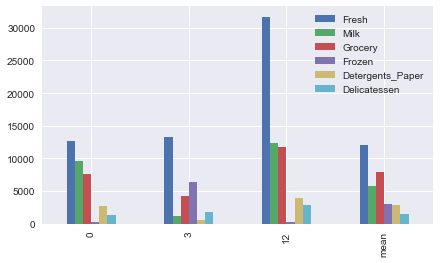

In [81]:
samples_bar = samples.append(data.describe().loc['mean', :])

#x_axis
samples_bar.index = indices + ['mean']

samples_bar.plot(kind='bar', figsize=(7,4))

**Answer:**
- I selected sample points because they look best disparate. 
  - Sample_0 (index:0): It is evident that this belongs to **Segment_0** where spending on "Milk", "Grocery" And "Detergents_Paper" is dominant.
  - Sample_1 (index:3): It is evident that this belongs to **Segment_1** because spending on "Fresh" and "Frozen" is high.
  - Sample_2 (index:12): The spending on "Milk", "Grocery" and "Detergents_Paper" is high, but spending on "Fresh" is super high as well. Given that spending on "Frozen" is almost zero, it seems we can cluster it under **Segment_0**.  
  

## Conclusion

In this final section, you will investigate ways that you can make use of the clustered data. First, you will consider how the different groups of customers, the ***customer segments***, may be affected differently by a specific delivery scheme. Next, you will consider how giving a label to each customer (which *segment* that customer belongs to) can provide for additional features about the customer data. Finally, you will compare the ***customer segments*** to a hidden variable present in the data, to see whether the clustering identified certain relationships.

### Question 10
Companies will often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively. 

* How can the wholesale distributor use the customer segments to determine which customers, if any, would react positively to the change in delivery service?*

**Hint:** Can we assume the change affects all customers equally? How can we determine which group of customers it affects the most?

**Answer:**
- In Segment_0:
  - Here, the impact of the change in the delivery method might not be considerable since the products("Milk", "Grocery" And "Detergents_Paper") are not super perishable. Even "Milk" and "Grocery" still last more than a week these days.  

- In Segment_1:
  - Here, the impact of the change in the delivery method might be considerable since the products("Fresh","Frozen") are super perishable such as fish, pork, tofu, etc. 

- Hence, the distributer should be careful when they apply their new change in Segment_1. 

- Of course, we can formalize the impact by running AB-tests. 
  - Sample 2 groups from each Segment.
  - Apply the new change to the customers in each one of the 2 groups.
  - As a metric to measure, we cross-reference their satisfaction level with their spending.
  
The key takeaway here is that we should run separate A/B tests for each cluster independently. As if we were to use all of our customers we would essentially have multiple variables(different delivery methods and different purchasing behaviors).

https://stats.stackexchange.com/questions/192752/clustering-and-a-b-testing

The two clusters that we have in our model reveal two different consumer profiles that can be tested via A/B test. To better assess the impact of the changes on the delivery service, we would have to split the segment 0 and segment 1 into subgroups measuring its consequences within a delta time. Hypothetically we can raise a scenario where the segment 0 is A/B tested. For this we divide the segment 0 (can also be implemented in segment 1) into two sub-groups of establishments where only one of them would suffer the implementation of the new delivery period of three days a week, and the another would remain as a control with five days a week as usual. After a certain period of time, we could, through the consumption levels of the establishments, come to some conclusions, such as: whether the new frequency of deliveries is sufficient or not for a buyer. Where a sensible increase in overall consumption of all products may indicate the need for the establishment to maintain a storage because of the decreasing delivery frequency; or if it negatively affects the consumption profile of certain products, like groups of costumers who have greater buying fresh produce that can be negatively impacted, precisely because of the demand for fresh products with a higher delivery frequency. We can not say that the change in frequency will affect equally all customers because of the different consumption profiles that are part of the two segments. There will therefore consumers that will be affected, and possibly groups of buyers who will not undergo any change.

### Question 11
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a ***customer segment*** it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a ***customer segment*** to determine the most appropriate delivery service.  
* How can the wholesale distributor label the new customers using only their estimated product spending and the **customer segment** data?

**Hint:** A supervised learner could be used to train on the original customers. What would be the target variable?

**Answer:**
- we can use some typical classification methods - SVM, RandomForest, Logistic Regression, etc...using their estimated product spending and the customer segment data. 
- Target variable would be the Segment membership (0/1)

Cluster assignment as new labels(Semi-Supervised)

https://en.wikipedia.org/wiki/Semi-supervised_learning

Another cool idea would be to use a subset of the newly engineered PCA components as new features(great for curing the curse of dimensionality). PCA is really cool and seem almost like magic at time. Just wait till you work with hundreds of features and you can reduce them down into just a handful. This technique becomes very handy especially with images. There is actually a handwritten digits dataset, using the "famous MNIST data" where you do just this and can get around a 98% classification accuracy after doing so.

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

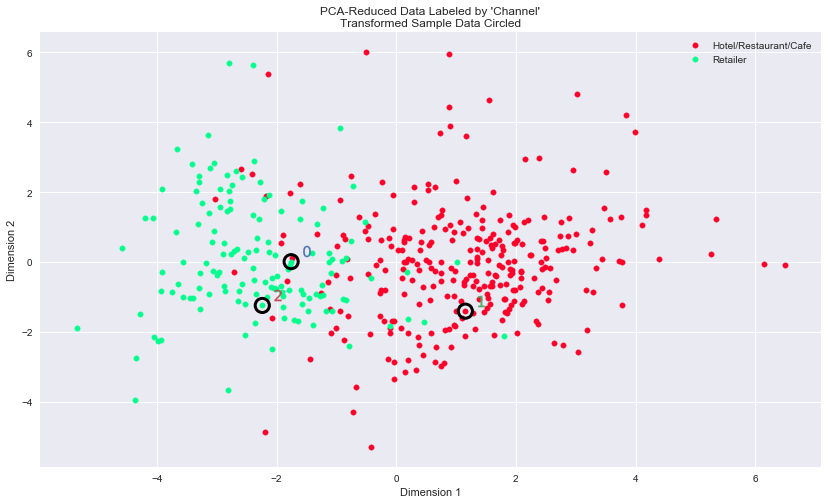

In [82]:
# Display the clustering results based on 'Channel' data
vs.channel_results(reduced_data, outliers, pca_samples)

### Question 12

* How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? 
* Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? 
* Would you consider these classifications as consistent with your previous definition of the customer segments?

**Answer:**
- I'd say this classification is consistent with our clustering results.
  - The size of clusters is consistent with the underlying distribution with 2 major clusters.
  - There are customer segments that classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' on the extreme left and right accordingly. 
  - I saw the Segment_0 as 'cafe' and it turns out it's Hotels/cafes.
  - I saw the Segment_1 as 'markets' and it turns out it's retailers.

In [101]:
#Maybe also fully examine how well the clustering algorithm did!

#find percentage of correctly classified customers
data = pd.read_csv("customers.csv")
data = data.drop(data.index[outliers]).reset_index(drop = True)

# might need to switch around the 0 and 1, based on your cluster seed
df = np.where(data['Channel'] == 0, 1, 1)
print("Percentage of correctly classified customers: {:.2%}".format(sum(df == preds)/float(len(preds))))

Percentage of correctly classified customers: 64.60%


In [102]:
data['Channel'].value_counts()

1    294
2    141
Name: Channel, dtype: int64